In [87]:
import matplotlib.pyplot as plt
from glob import glob
import json

transaction_data = {}
transaction__no_buffering_data = {}

for f in glob("../validation_*.json"):
    method = f.split("_")[1]
    iterations = int(f.split("_")[2])
    no_files = int(f.split("_")[3].split(".")[0])
    with open(f) as f:
        data = json.load(f)
        if method == "Transaction":
            transaction_data[(iterations, no_files)] = data
        else:
            transaction__no_buffering_data[(iterations, no_files)] = data


In [88]:
for k, v in transaction_data.items():
    print(k, v)
    break

(1000, 1) {'only_write_2': {'duration': 1.157, 'collisions': 246, 'avgExtraTime': 174.385, 'numProcesses': 2}, 'only_write_1': {'duration': 2.716, 'collisions': 0, 'avgExtraTime': 244.639, 'numProcesses': 1}, 'read_write_1': {'duration': 2.079, 'collisions': 0, 'avgExtraTime': 88.019, 'numProcesses': 1}, 'read_write_2': {'duration': 1.071, 'collisions': 231, 'avgExtraTime': 72.22200000000001, 'numProcesses': 2}, 'only_write_4': {'duration': 0.743, 'collisions': 615, 'avgExtraTime': 91.14100000000002, 'numProcesses': 4}, 'read_write_3': {'duration': 0.757, 'collisions': 323, 'avgExtraTime': 66.77677677677677, 'numProcesses': 3}, 'only_write_3': {'duration': 0.844, 'collisions': 478, 'avgExtraTime': 124.48248248248247, 'numProcesses': 3}, 'read_write_4': {'duration': 0.658, 'collisions': 396, 'avgExtraTime': 64.423, 'numProcesses': 4}}


In [94]:
for k, v in transaction__no_buffering_data.items():
    print(k, v)
    break

(1000, 1) {'only_write_2': {'duration': 12.653, 'collisions': 1, 'avgExtraTime': 7.832, 'numProcesses': 2}, 'only_write_1': {'duration': 23.453, 'collisions': 0, 'avgExtraTime': 0, 'numProcesses': 1}, 'read_write_1': {'duration': 22.788, 'collisions': 0, 'avgExtraTime': 0, 'numProcesses': 1}, 'read_write_2': {'duration': 12.631, 'collisions': 157, 'avgExtraTime': 1209.4470000000001, 'numProcesses': 2}, 'only_write_4': {'duration': 7.632, 'collisions': 49, 'avgExtraTime': 465.621, 'numProcesses': 4}, 'read_write_3': {'duration': 9.263, 'collisions': 245, 'avgExtraTime': 1955.2912912912914, 'numProcesses': 3}, 'only_write_3': {'duration': 9.095, 'collisions': 38, 'avgExtraTime': 316.1071071071071, 'numProcesses': 3}, 'read_write_4': {'duration': 8.237, 'collisions': 335, 'avgExtraTime': 3053.683, 'numProcesses': 4}}


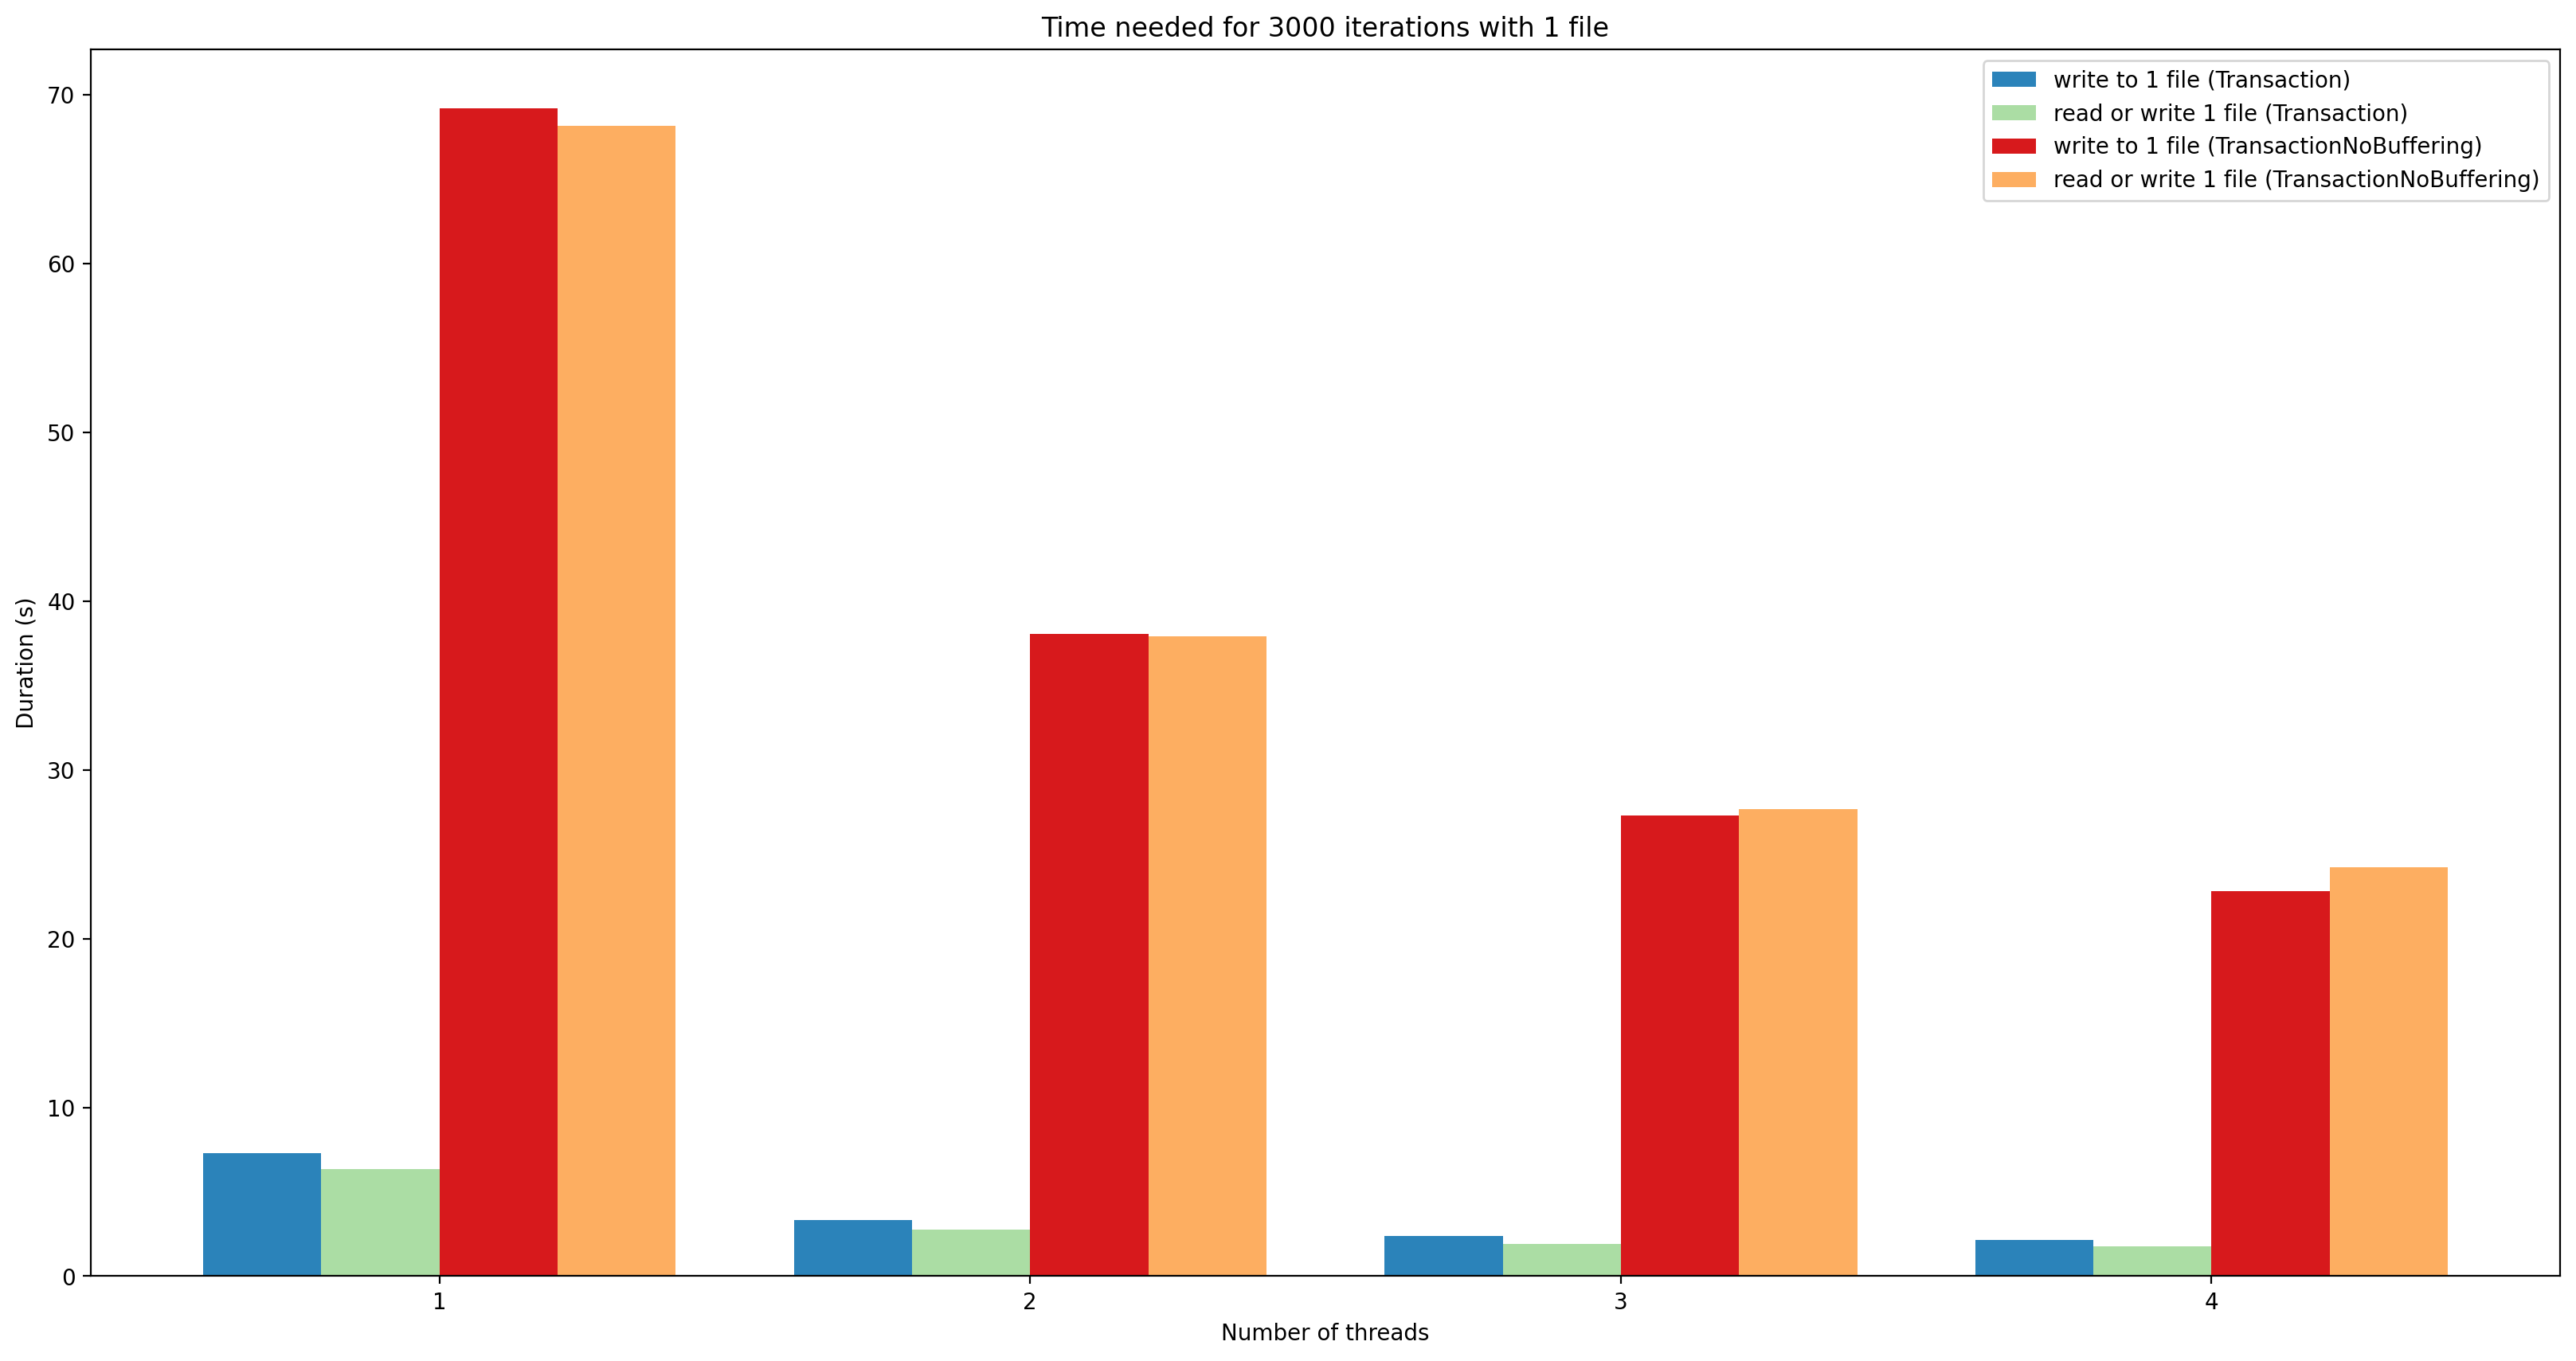

In [89]:
# plot 1: compare only_write_1, read_write_1 vs ... vs only_write_4, read_write_4 for (3000,1)
chosen_iter = (3000, 1)
chosen_stat = "duration"
x = [1, 2, 3, 4]
y_w_1_buf_dur = [transaction_data[chosen_iter]["only_write_1"][chosen_stat], transaction_data[chosen_iter]["only_write_2"][chosen_stat], transaction_data[chosen_iter]["only_write_3"][chosen_stat], transaction_data[chosen_iter]["only_write_4"][chosen_stat]]
y_rw_1_buf_dur = [transaction_data[chosen_iter]["read_write_1"][chosen_stat], transaction_data[chosen_iter]["read_write_2"][chosen_stat], transaction_data[chosen_iter]["read_write_3"][chosen_stat], transaction_data[chosen_iter]["read_write_4"][chosen_stat]]
y_w_1_no_buf_dur = [transaction__no_buffering_data[chosen_iter]["only_write_1"][chosen_stat], transaction__no_buffering_data[chosen_iter]["only_write_2"][chosen_stat], transaction__no_buffering_data[chosen_iter]["only_write_3"][chosen_stat], transaction__no_buffering_data[chosen_iter]["only_write_4"][chosen_stat]]
y_rw_1_no_buf_dur = [transaction__no_buffering_data[chosen_iter]["read_write_1"][chosen_stat], transaction__no_buffering_data[chosen_iter]["read_write_2"][chosen_stat], transaction__no_buffering_data[chosen_iter]["read_write_3"][chosen_stat], transaction__no_buffering_data[chosen_iter]["read_write_4"][chosen_stat]]

# barplot
width = 0.2  # the width of the bars
plt.figure(figsize=(20,10), dpi=200)
plt.bar([p - width*1.5 for p in x], y_w_1_buf_dur, width=width, color='#2b83ba', align='center', label='write to 1 file (Transaction)')
plt.bar([p - width*0.5 for p in x], y_rw_1_buf_dur, width=width, color='#abdda4', align='center', label='read or write 1 file (Transaction)')
plt.bar([p + width*0.5 for p in x], y_w_1_no_buf_dur, width=width, color='#d7191c', align='center', label='write to 1 file (TransactionNoBuffering)')
plt.bar([p + width*1.5 for p in x], y_rw_1_no_buf_dur, width=width, color='#fdae61', align='center', label='read or write 1 file (TransactionNoBuffering)')
plt.legend()
plt.xticks(x, [str(i) for i in x])
# plt.yscale('log')
# plt.yticks([0.1, 1, 10, 100], ["0.1", "1", "10", "100"])
plt.xlabel("Number of threads")
plt.ylabel("Duration (s)")
plt.title("Time needed for 3000 iterations with 1 file")
plt.show()

[60.595, 54.102666666666664, 75.95233333333333]
[1197.0106666666666, 1961.5336666666665, 2698.1976666666665]


Text(0.5, 1.0, 'Average extra time of both implementations in relation to the number of collisions and the number of threads')

<Figure size 4000x2000 with 0 Axes>

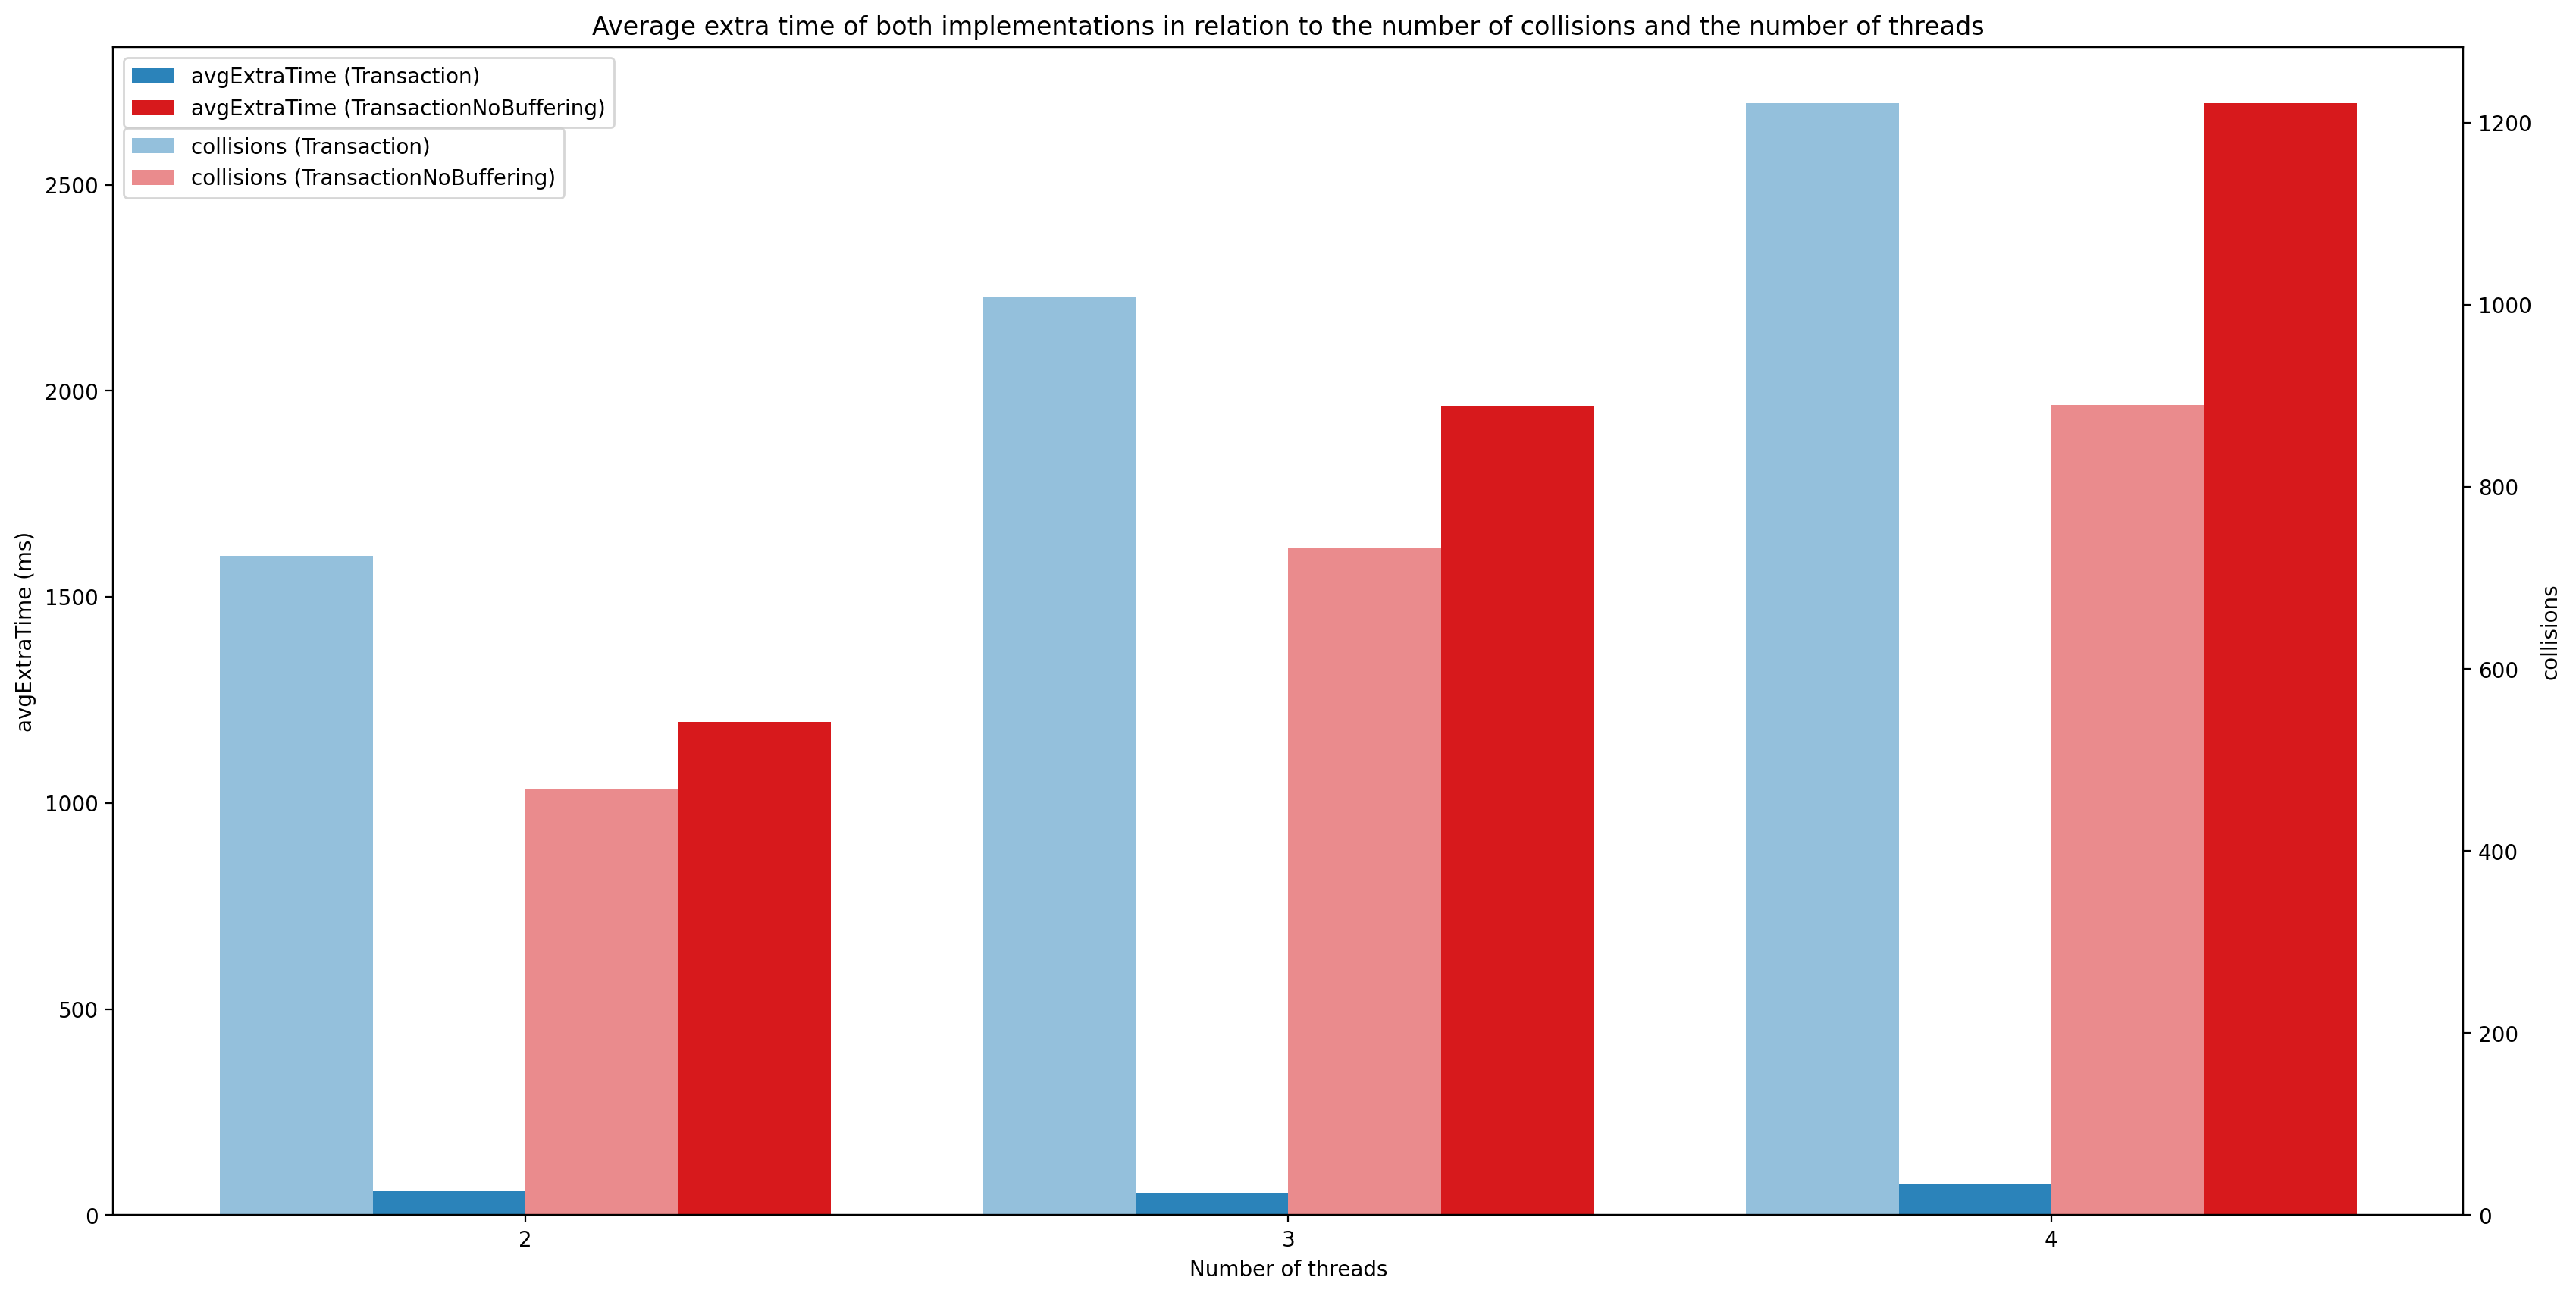

In [95]:
# plot 1: compare only_write_1, read_write_1 vs ... vs only_write_4, read_write_4 for (3000,1)
chosen_iter = (3000, 1)
chosen_stat = "avgExtraTime"
x = [2, 3, 4]
y_rw_1_buf_extratime = [transaction_data[chosen_iter]["read_write_2"][chosen_stat], transaction_data[chosen_iter]["read_write_3"][chosen_stat], transaction_data[chosen_iter]["read_write_4"][chosen_stat]]
y_rw_1_no_buf_extratime = [ transaction__no_buffering_data[chosen_iter]["read_write_2"][chosen_stat], transaction__no_buffering_data[chosen_iter]["read_write_3"][chosen_stat], transaction__no_buffering_data[chosen_iter]["read_write_4"][chosen_stat]]

chosen_stat = "collisions"
x = [2, 3, 4]
y_rw_1_buf_collisions = [transaction_data[chosen_iter]["read_write_2"][chosen_stat], transaction_data[chosen_iter]["read_write_3"][chosen_stat], transaction_data[chosen_iter]["read_write_4"][chosen_stat]]
y_rw_1_no_buf_collisions = [transaction__no_buffering_data[chosen_iter]["read_write_2"][chosen_stat], transaction__no_buffering_data[chosen_iter]["read_write_3"][chosen_stat], transaction__no_buffering_data[chosen_iter]["read_write_4"][chosen_stat]]


# barplot
width = 0.2  # the width of the bars
plt.figure(figsize=(20,10), dpi=200)
fig, ax1 = plt.subplots(figsize=(20,10), dpi=200)

# Plot avgExtraTime on the first y-axis
ax1.bar([p - width*0.5 for p in x], y_rw_1_buf_extratime, width=width, color='#2b83ba', align='center', label='avgExtraTime (Transaction)')
ax1.bar([p + width*1.5 for p in x], y_rw_1_no_buf_extratime, width=width, color='#d7191c', align='center', label='avgExtraTime (TransactionNoBuffering)')
ax1.set_ylabel('avgExtraTime (ms)')
ax1.set_xlabel('Number of threads')
ax1.set_xticks(x)
ax1.legend(loc='upper left')

# Create a second y-axis for collisions
ax2 = ax1.twinx()
ax2.bar([p - width*1.5 for p in x], y_rw_1_buf_collisions, width=width, color='#2b83ba', align='center', label='collisions (Transaction)', alpha=0.5)
ax2.bar([p + width*0.5 for p in x], y_rw_1_no_buf_collisions, width=width, color='#d7191c', align='center', label='collisions (TransactionNoBuffering)', alpha=0.5)
ax2.set_ylabel('collisions')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.94))
print(y_rw_1_buf_extratime)
print(y_rw_1_no_buf_extratime)
plt.title("Average extra time of both implementations in relation to the number of collisions and the number of threads")

[69.814, 64.423, 75.95233333333333]
[2677.268, 3053.683, 2698.1976666666665]


Text(0.5, 1.0, 'Average extra time of both implementations in relation to the number of collisions and the number of iterations')

<Figure size 4000x2000 with 0 Axes>

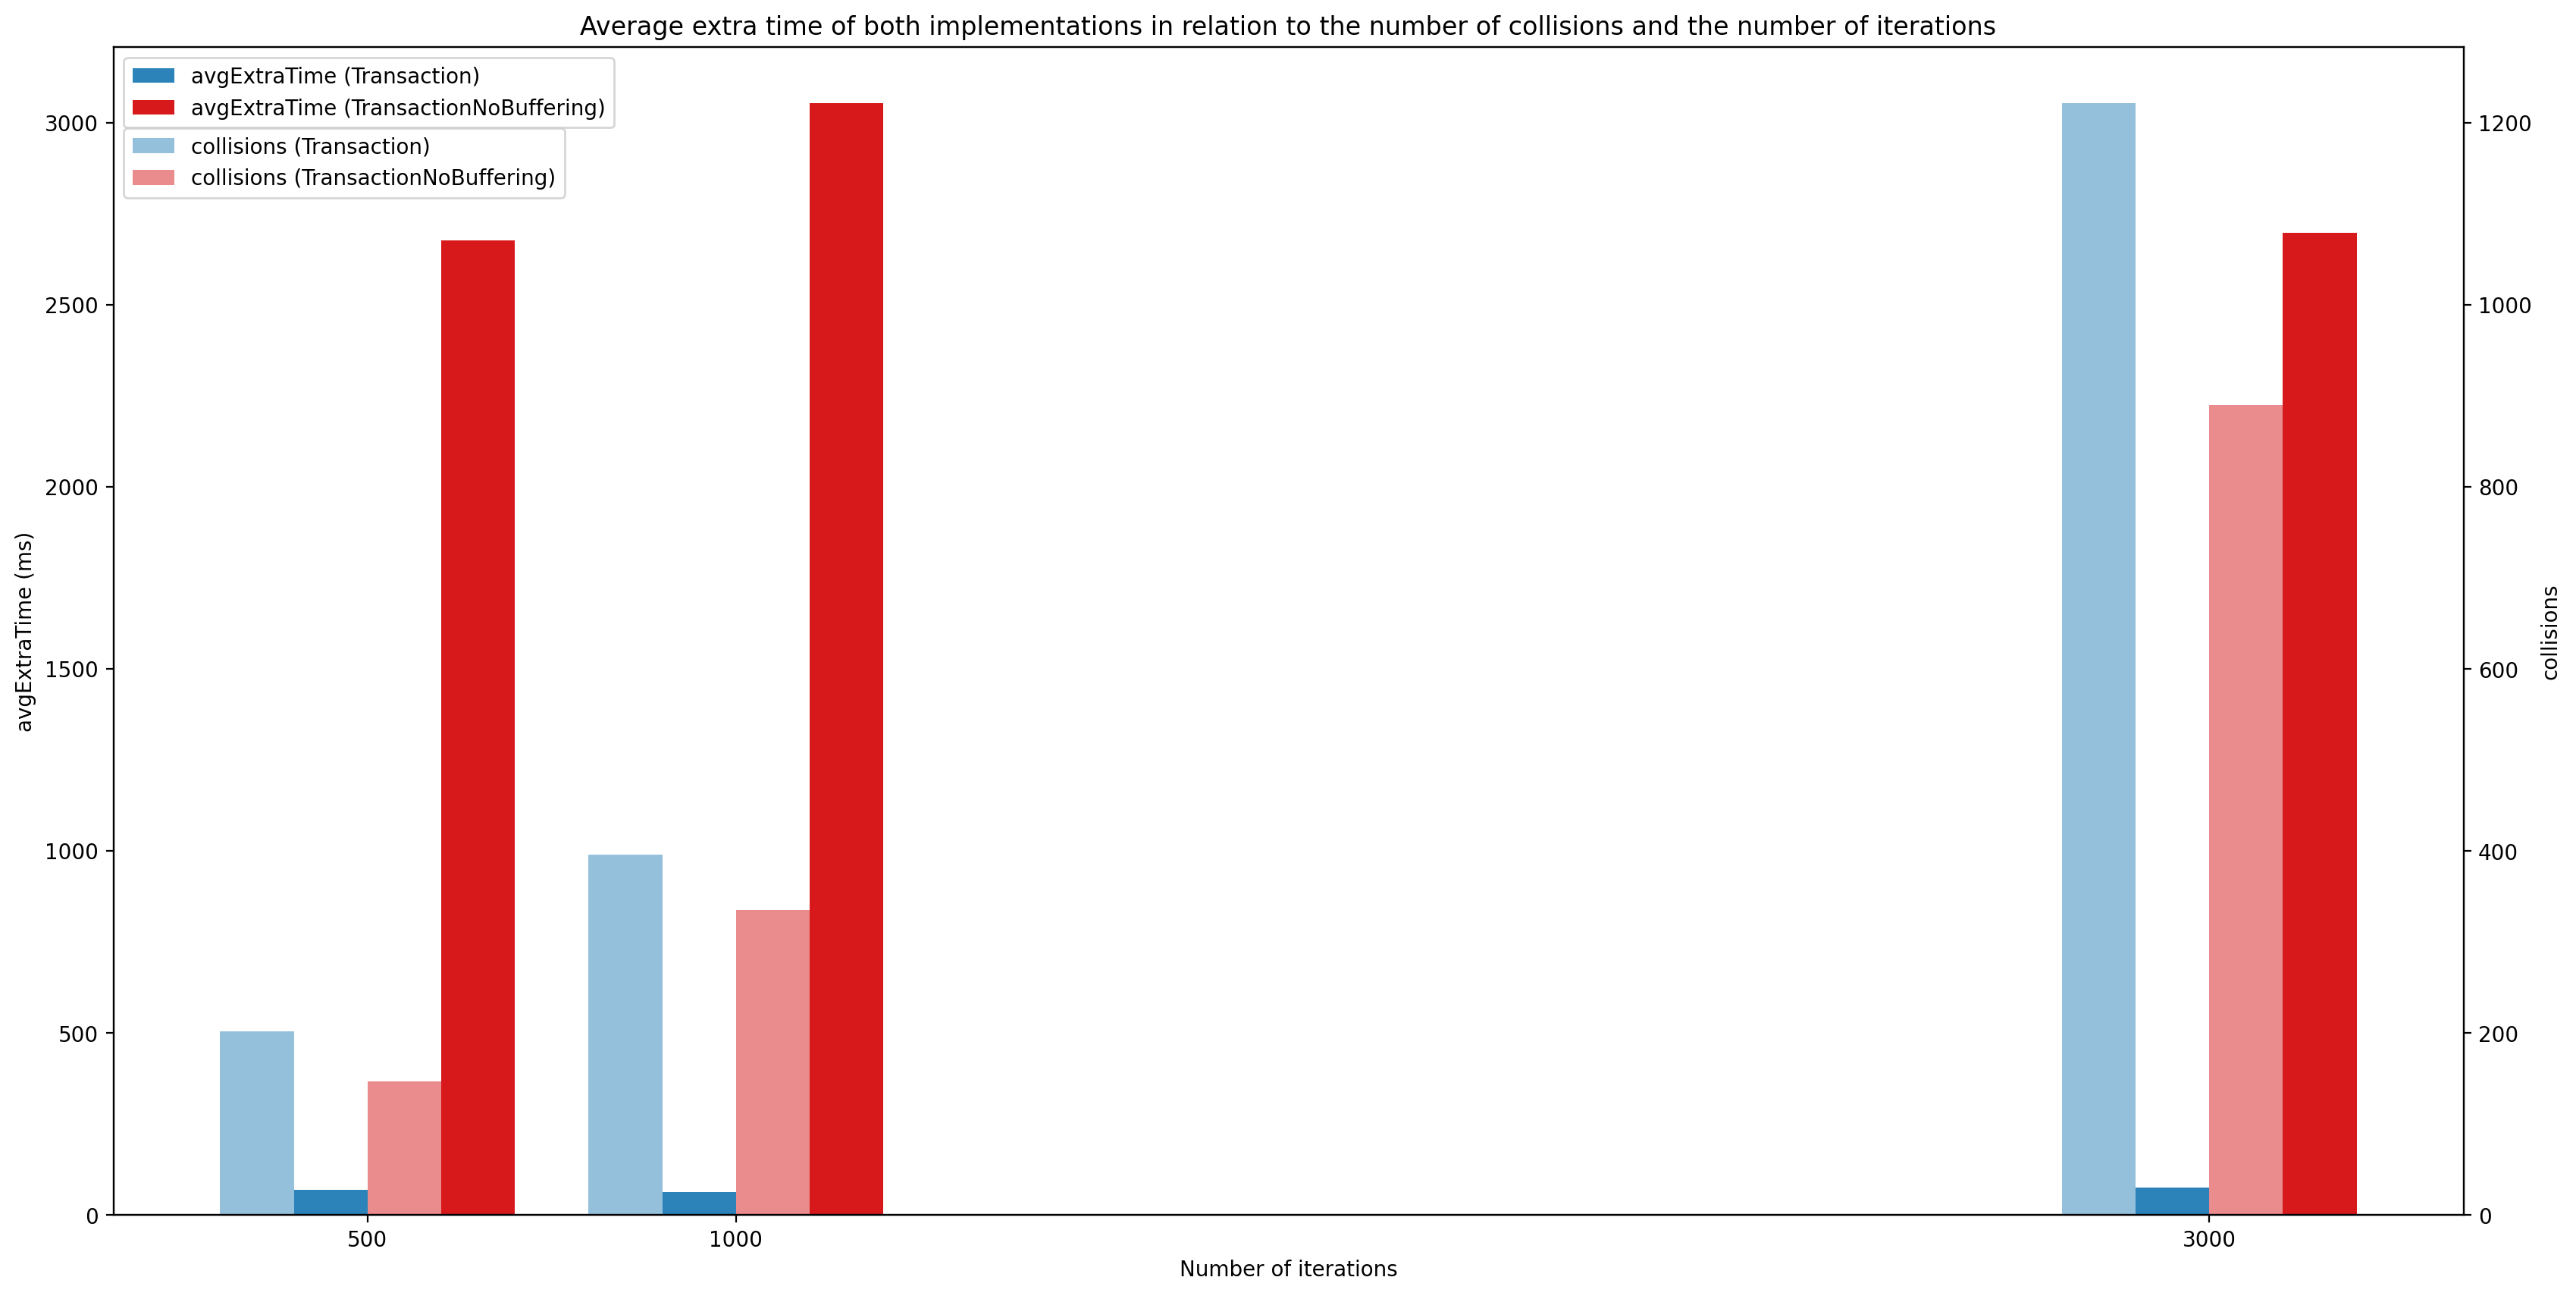

In [96]:
# plot 1: compare only_write_1, read_write_1 vs ... vs only_write_4, read_write_4 for (3000,1)
chosen_situation = "read_write_4"
chosen_stat = "avgExtraTime"
x = [500, 1000, 3000]
y_rw4_buf_extratime = [transaction_data[chosen_iter][chosen_situation][chosen_stat] for chosen_iter in [(500, 1), (1000, 1), (3000, 1)]]
y_rw4_no_buf_extratime = [transaction__no_buffering_data[chosen_iter][chosen_situation][chosen_stat] for chosen_iter in [(500, 1), (1000, 1), (3000, 1)]]

chosen_stat = "collisions"
y_rw4_buf_collisions = [transaction_data[chosen_iter][chosen_situation][chosen_stat] for chosen_iter in [(500, 1), (1000, 1), (3000, 1)]]
y_rw4_no_buf_collisions = [transaction__no_buffering_data[chosen_iter][chosen_situation][chosen_stat] for chosen_iter in [(500, 1), (1000, 1), (3000, 1)]]


# barplot
width = 100  # the width of the bars
plt.figure(figsize=(20,10), dpi=200)
fig, ax1 = plt.subplots(figsize=(20,10), dpi=200)

# Plot avgExtraTime on the first y-axis
ax1.bar([p - width*0.5 for p in x], y_rw4_buf_extratime, width=width, color='#2b83ba', align='center', label='avgExtraTime (Transaction)')
ax1.bar([p + width*1.5 for p in x], y_rw4_no_buf_extratime, width=width, color='#d7191c', align='center', label='avgExtraTime (TransactionNoBuffering)')
ax1.set_ylabel('avgExtraTime (ms)')
ax1.set_xlabel('Number of iterations')
ax1.set_xticks(x)
ax1.legend(loc='upper left')

# Create a second y-axis for collisions
ax2 = ax1.twinx()
ax2.bar([p - width*1.5 for p in x], y_rw4_buf_collisions, width=width, color='#2b83ba', align='center', label='collisions (Transaction)', alpha=0.5)
ax2.bar([p + width*0.5 for p in x], y_rw4_no_buf_collisions, width=width, color='#d7191c', align='center', label='collisions (TransactionNoBuffering)', alpha=0.5)
ax2.set_ylabel('collisions')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.94))
print(y_rw4_buf_extratime)
print(y_rw4_no_buf_extratime)
plt.title("Average extra time of both implementations in relation to the number of collisions and the number of iterations")

[75.95233333333333, 84.37266666666667, 69.68866666666668]
[2698.1976666666665, 796.8433333333334, 367.75266666666664]


Text(0.5, 1.0, 'Average extra time of both implementations in relation to the number of collisions and the number of iterations')

<Figure size 4000x2000 with 0 Axes>

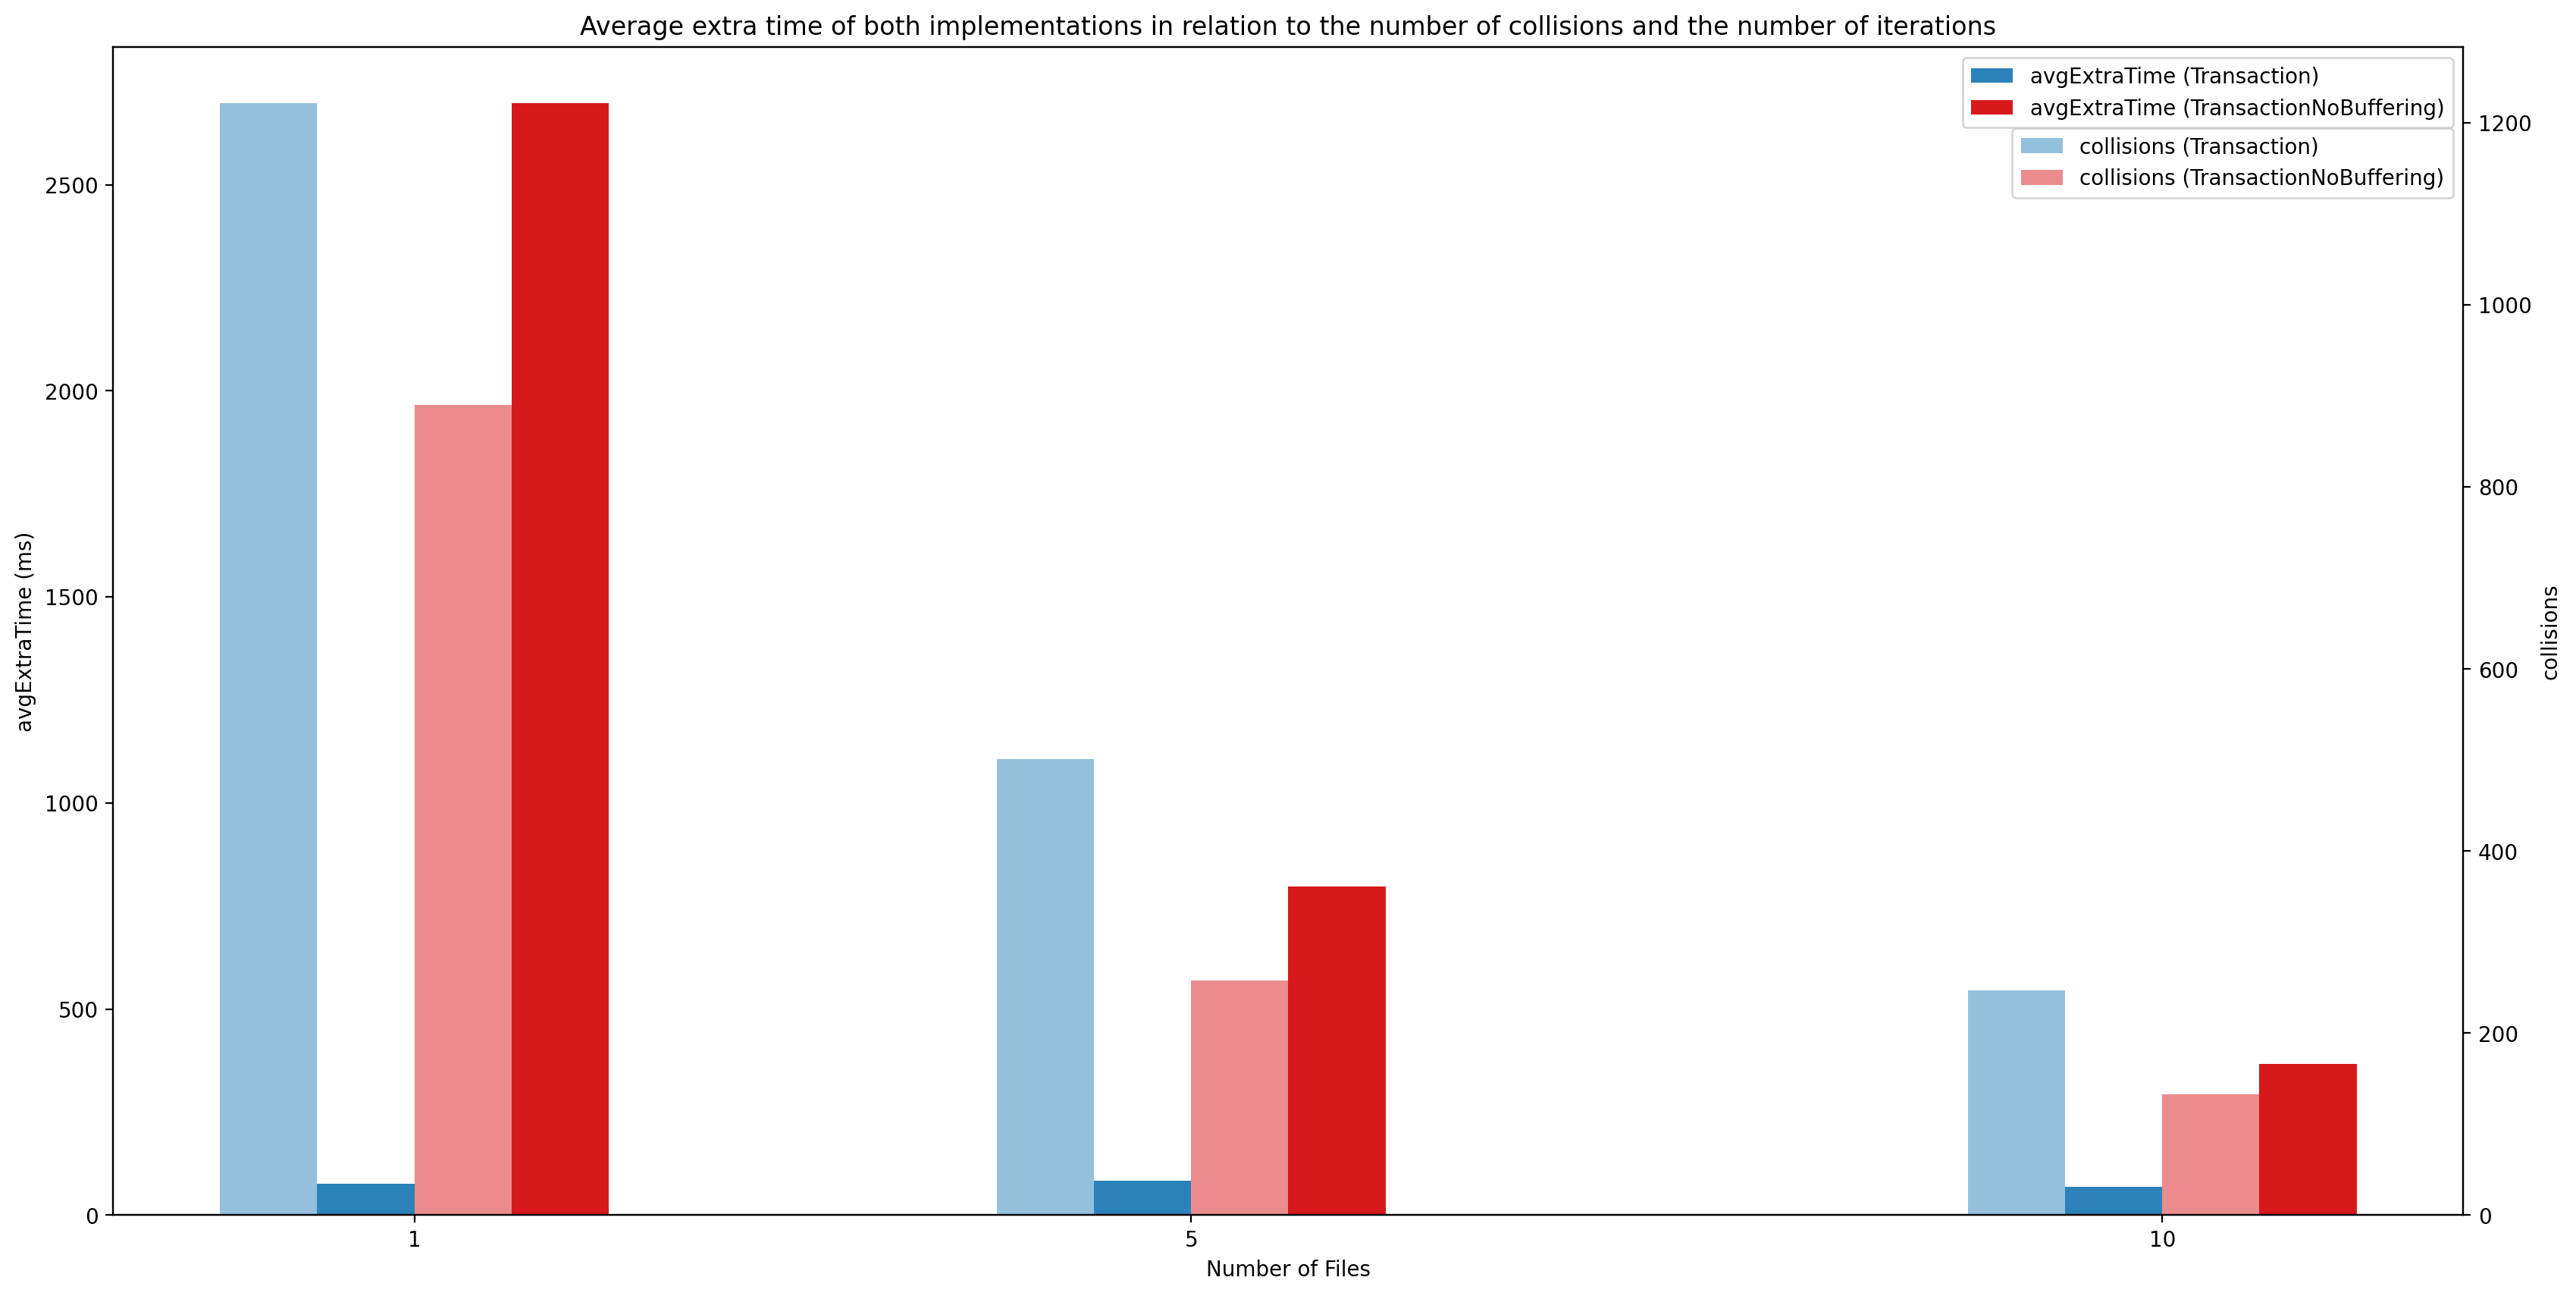

In [99]:
# plot 1: compare only_write_1, read_write_1 vs ... vs only_write_4, read_write_4 for (3000,1)
chosen_situation = "read_write_4"
chosen_stat = "avgExtraTime"
x = [1, 5, 10]
y_rw4_buf_extratime = [transaction_data[chosen_iter][chosen_situation][chosen_stat] for chosen_iter in [(3000, 1), (3000, 5), (3000, 10)]]
y_rw4_no_buf_extratime = [transaction__no_buffering_data[chosen_iter][chosen_situation][chosen_stat] for chosen_iter in [(3000, 1), (3000, 5), (3000, 10)]]

chosen_stat = "collisions"
y_rw4_buf_collisions = [transaction_data[chosen_iter][chosen_situation][chosen_stat] for chosen_iter in [(3000, 1), (3000, 5), (3000, 10)]]
y_rw4_no_buf_collisions = [transaction__no_buffering_data[chosen_iter][chosen_situation][chosen_stat] for chosen_iter in [(3000, 1), (3000, 5), (3000, 10)]]


# barplot
width = .5  # the width of the bars
plt.figure(figsize=(20,10), dpi=200)
fig, ax1 = plt.subplots(figsize=(20,10), dpi=200)

# Plot avgExtraTime on the first y-axis
ax1.bar([p - width*0.5 for p in x], y_rw4_buf_extratime, width=width, color='#2b83ba', align='center', label='avgExtraTime (Transaction)')
ax1.bar([p + width*1.5 for p in x], y_rw4_no_buf_extratime, width=width, color='#d7191c', align='center', label='avgExtraTime (TransactionNoBuffering)')
ax1.set_ylabel('avgExtraTime (ms)')
ax1.set_xlabel('Number of Files')
ax1.set_xticks(x)

# Create a second y-axis for collisions
ax2 = ax1.twinx()
ax2.bar([p - width*1.5 for p in x], y_rw4_buf_collisions, width=width, color='#2b83ba', align='center', label='collisions (Transaction)', alpha=0.5)
ax2.bar([p + width*0.5 for p in x], y_rw4_no_buf_collisions, width=width, color='#d7191c', align='center', label='collisions (TransactionNoBuffering)', alpha=0.5)
ax2.set_ylabel('collisions')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
print(y_rw4_buf_extratime)
print(y_rw4_no_buf_extratime)
plt.title("Average extra time of both implementations in relation to the number of collisions and the number of iterations")